In [1]:
# ws08
from sklearn import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

digits = datasets.load_digits()

In [2]:
n_samples = len(digits.images) 
X = digits.images.reshape((n_samples, -1))

X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [3]:
X.shape

(1797, 64)

In [4]:
y = digits.target
y[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [6]:
pca.n_components_

64

In [7]:
pca

PCA()

In [8]:
X_pca.shape

(1797, 64)

In [9]:
print(pca.components_.shape)

(64, 64)


In [10]:
exp_variance = pca.explained_variance_ratio_
exp_variance

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

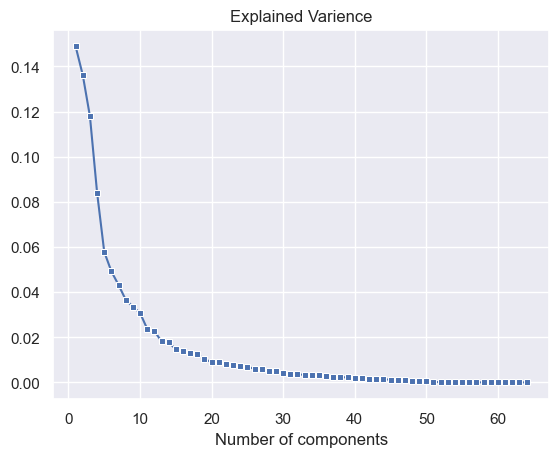

In [11]:
sns.set_theme()

x = list(range(1, len(exp_variance)+1))
sns.lineplot(x=x, y=exp_variance, marker='s', markersize=4)
plt.title('Explained Varience')
plt.xlabel('Number of components')

plt.show()

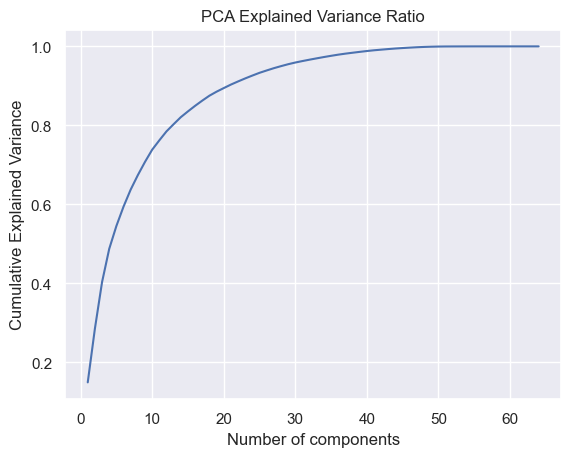

In [12]:
import numpy as np
sns.set_theme()
x = list(range(1, len(exp_variance)+1))
sns.lineplot(x=x, y=np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance');
plt.title('PCA Explained Variance Ratio')

plt.show()

In [13]:
pca_num = PCA(.95)
pca_num.fit(X)
pca_num.n_components_

29

In [14]:
n_comp = 2
pca = PCA(n_components=n_comp)
pca.fit(X)
print('Explained variance by %i components: %0.3f' % 
      (n_comp, np.sum(pca.explained_variance_ratio_)))

Explained variance by 2 components: 0.285


In [15]:

X_pca = pca.transform(X)
X_pca.shape

(1797, 2)

In [16]:
df = pd.DataFrame(X_pca, columns=['pca1','pca2'])
df.head()

,pca1,pca2
0,-1.259466,-21.274883
1,7.957611,20.768699
2,6.991923,9.955986
3,-15.906105,-3.332464
4,23.306867,-4.269061


In [17]:
df['labels'] = y
df.head()

,pca1,pca2,labels
0,-1.259466,-21.274883,0
1,7.957611,20.768699,1
2,6.991923,9.955986,2
3,-15.906105,-3.332464,3
4,23.306867,-4.269061,4


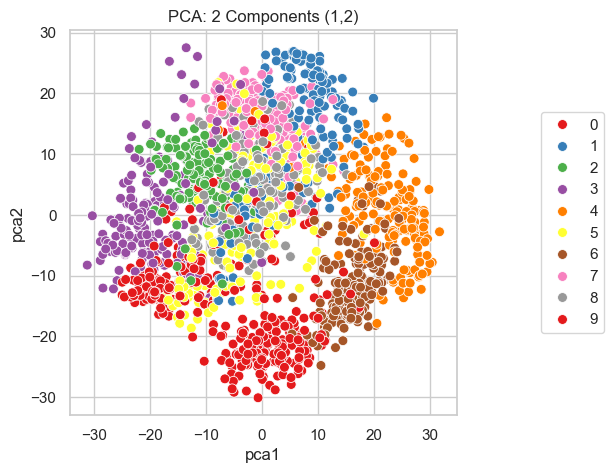

In [18]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 5, 5  
g=sns.scatterplot(x='pca1', y='pca2', data=df, hue='labels', 
                  s=50, palette='Set1', legend='full')
g.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), ncol=1)
plt.title('PCA: 2 Components (1,2)')
plt.show()

In [19]:
#df.species.unique()

In [20]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0) # 
X_train.shape , X_test.shape

((1347, 64), (450, 64))

In [21]:

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier

n_comp = 25
pipe = Pipeline([

                 ('pca', PCA(n_components=n_comp, whiten=True)),
                ('svc',SVC(gamma='scale'))
               ])

pipe.fit(X_train, y_train)

cvs = cross_val_score(pipe, X, y, cv=10)  
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.97 0.99 0.94 0.96 0.99 0.98 0.99 0.99 0.98 0.97]
Average (%) = 97.66


In [22]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy Score: 0.9956
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       0.98      1.00      0.99        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       1.00      0.98      0.99        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      1.00      0.99        47

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 

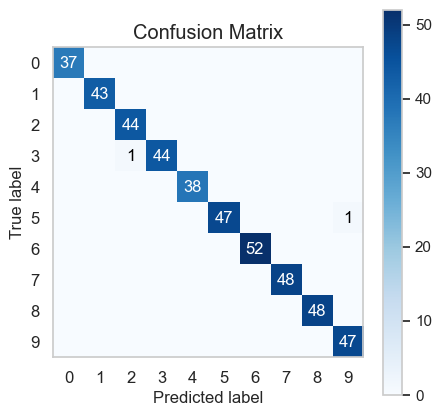

In [23]:
import scikitplot as skplot

y_pred = pipe.predict(X_test)
skplot.metrics.plot_confusion_matrix(y_test, y_pred, hide_zeros=True)

plt.show()

In [24]:
pipe.predict(X_test)
pipe.predict([X[5]])
pipe.predict([X[15]])
pipe.predict([X[25]])

array([5])

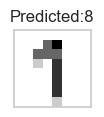

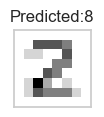

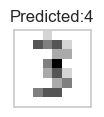

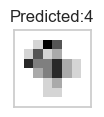

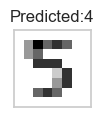

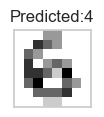

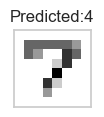

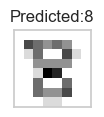

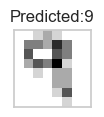

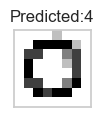

In [28]:

import numpy as np
from PIL import Image, ImageOps

def predict_digit(imgfile): 
    img = Image.open(imgfile).convert('L') 
    img = ImageOps.invert(img)
    img = img.resize((8, 8), Image.LANCZOS) 

    pixel = np.array(img)
    pixel = pixel / 255.0 * 16
    pixel = pixel.astype('int')
    
    my_digit = pixel.reshape(1, -1)
    predicted = pipe.predict(my_digit) 
   
    plt.figure(figsize=(1,1))
    plt.imshow(pixel, cmap=plt.cm.gray_r)
    plt.title('Predicted:{}'. format(predicted[0]))
    plt.xticks([])
    plt.yticks([])    
    plt.show()

imgfiles = ['digit1.png','digit2.png','digit3.png','digit4.png','digit5.png',
            'digit6.png','digit7.png','digit8.png','digit9.png','digit0.png']
for i in imgfiles:
    predict_digit(i)